In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_donor = pd.read_csv('../data.csv')
path = '../PatternDetection/clusteringMeasures/RESCAL/SemEP/clusters/'
data_donor = data_donor.iloc[:, :-3]

entries = os.listdir(path)
for file in entries:
    cls = pd.read_csv(path + file, delimiter="\t", header=None)
    cls.columns = ['Donor']
    data_donor.loc[data_donor.donor.isin(cls.Donor), 'cluster'] = int(file[:-4].split('-')[1])
data_donor = data_donor.astype({'cluster':'int'})

# Violin Plots

In [2]:
def data_violinplot(data_donor, replacement_mapping_dict, cls):
    data_cytometric = pd.DataFrame(columns=['parameter', 'Parameter values', 'Functional HBV'])
    for key, val in replacement_mapping_dict.items():
        df = pd.DataFrame(columns=['parameter', 'Parameter values', 'Functional HBV'])
        df['Parameter values'] = data_donor[(data_donor[key]!=-1000) & (data_donor['response']=='cured') &
                                   (data_donor['cluster']==cls)][key].values
        df['parameter'] = val
        df['Functional HBV'] = 'cure'
        data_cytometric = pd.concat([data_cytometric, df])
        df = pd.DataFrame(columns=['parameter', 'Parameter values', 'Functional HBV'])
        df['Parameter values'] = data_donor[(data_donor[key]!=-1000) & (data_donor['response']=='non_cured') &
                                   (data_donor['cluster']==cls)][key].values
        df['parameter'] = val
        df['Functional HBV'] = 'non-cure'
        data_cytometric = pd.concat([data_cytometric, df])
#     data_cytometric['parameter'].replace(replacement_mapping_dict, inplace=True)
    return data_cytometric

## CD8+

In [3]:
replacement_mapping_dict = {'CD3pos_CD8pos_CD14neg_CD19neg': 'CD8$^+$T cells',
                            'CD3pos_CD8pos_CD14neg_CD19neg_CD45RAneg_CCR7neg': 'CD8$^+$TEM cells',
                           'CD3pos_CD8pos_CD14neg_CD19neg_CD45RAneg_CCR7pos': 'CD8$^+$TCM cells',
                           'CD3pos_CD8pos_CD14neg_CD19neg_HLA_DRpos': 'CD8$^+$HLA_DR+ T cells',
                           'CD3pos_CD8pos_CD14neg_CD19neg_Ki67pos': 'CD8$^+$Ki67+ T cells',}

(-5.0, 78.0)

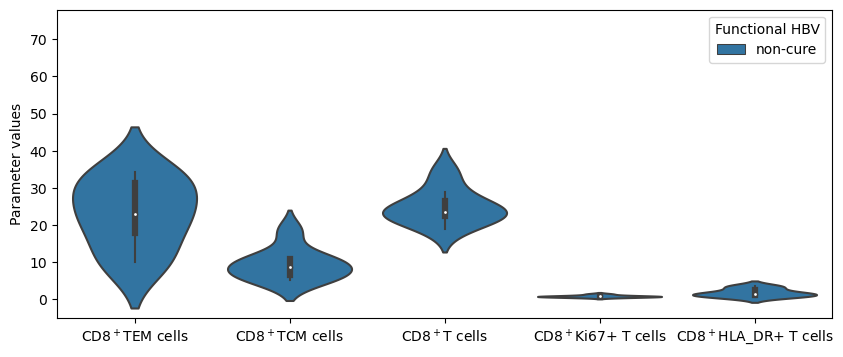

In [4]:
data_cytometric = data_violinplot(data_donor, replacement_mapping_dict, 0)
data_cytometric = data_cytometric.sort_values(by=['Functional HBV', 'parameter'], ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(data=data_cytometric, x="parameter", y="Parameter values", hue="Functional HBV")#, inner="stick"  , cut=0
ax.set(xlabel="")
plt.ylim(-5, 78)
plt.xticks(fontsize=10, rotation='vertical')
plt.savefig('Violin/CD8_Cluster1.pdf', bbox_inches='tight', format='pdf', transparent=True)

In [5]:
data_cytometric.to_csv('Violin/CD8_community1.csv', index=None)

(-5.0, 78.0)

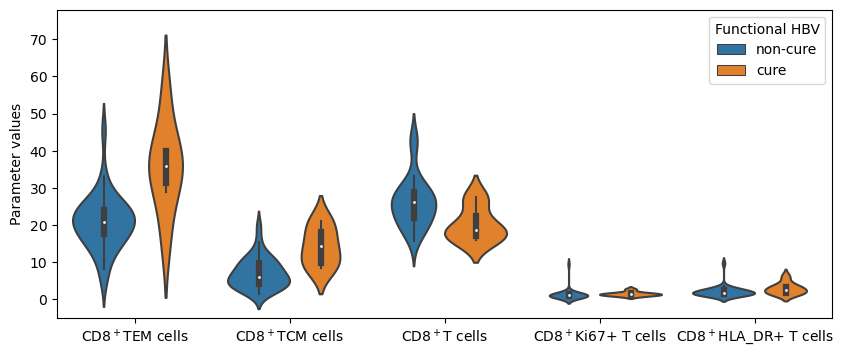

In [5]:
data_cytometric = data_violinplot(data_donor, replacement_mapping_dict, 1)
data_cytometric = data_cytometric.sort_values(by=['Functional HBV', 'parameter'], ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(data=data_cytometric, x="parameter", y="Parameter values", hue="Functional HBV")#, bw=0.4
ax.set(xlabel="")
plt.ylim(-5, 78)
plt.xticks(fontsize=10, rotation='vertical')
plt.savefig('Violin/CD8_Cluster2_cut.pdf', bbox_inches='tight', format='pdf', transparent=True)

In [7]:
data_cytometric.to_csv('Violin/CD8_community2.csv', index=None)

## CD4+

In [6]:
replacement_mapping_dict = {'CD3pos_CD4pos_CD14neg_CD19neg': 'CD4$^+$T cells',
                            'CD3pos_CD4pos_CD14neg_CD19neg_CD45RAneg_CCR7neg': 'CD4$^+$TEM cells',
                           'CD3pos_CD4pos_CD14neg_CD19neg_CD45RAneg_CCR7pos': 'CD4$^+$TCM cells',
                           'CD3pos_CD4pos_CD14neg_CD19neg_HLA_DRpos': 'CD4$^+$HLA_DR+ T cells',
                           'CD3pos_CD4pos_CD14neg_CD19neg_Ki67pos': 'CD4$^+$Ki67+ T cells',
                           }

(-5.0, 82.0)

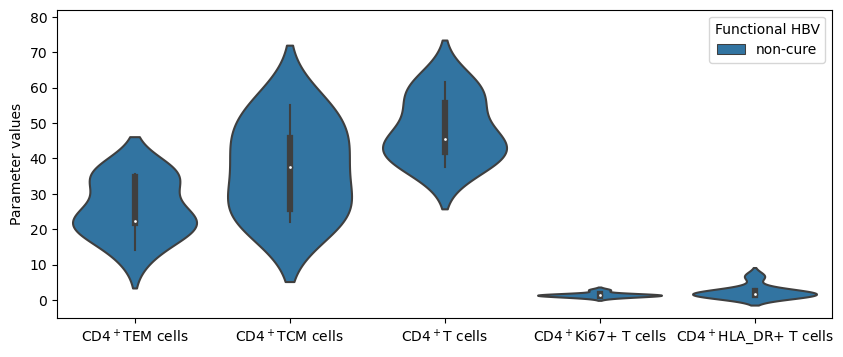

In [7]:
data_cytometric = data_violinplot(data_donor, replacement_mapping_dict, 0)
data_cytometric = data_cytometric.sort_values(by=['Functional HBV', 'parameter'], ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(data=data_cytometric, x="parameter", y="Parameter values", hue="Functional HBV")#, inner="stick"
ax.set(xlabel="")
plt.ylim(-5, 82)
plt.xticks(fontsize=10, rotation='vertical')
plt.savefig('Violin/CD4_Cluster1.pdf', bbox_inches='tight', format='pdf', transparent=True)

In [10]:
data_cytometric.to_csv('Violin/CD4_community1.csv', index=None)

(-5.0, 82.0)

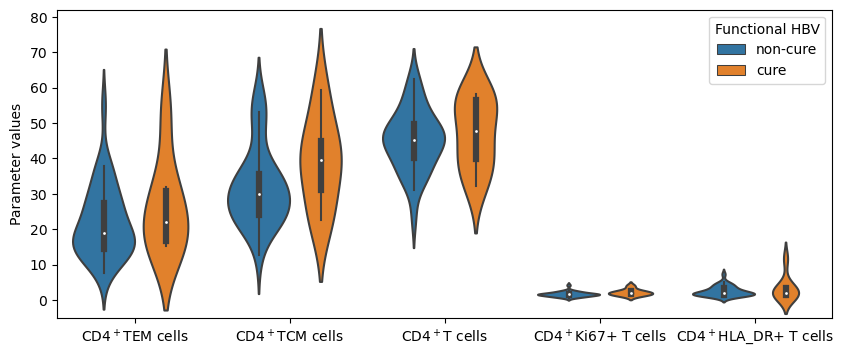

In [8]:
data_cytometric = data_violinplot(data_donor, replacement_mapping_dict, 1)
data_cytometric = data_cytometric.sort_values(by=['Functional HBV', 'parameter'], ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(data=data_cytometric, x="parameter", y="Parameter values", hue="Functional HBV")#, inner="stick"
ax.set(xlabel="")
plt.ylim(-5, 82)
plt.xticks(fontsize=10, rotation='vertical')
plt.savefig('Violin/CD4_Cluster2.pdf', bbox_inches='tight', format='pdf', transparent=True)

In [12]:
data_cytometric.to_csv('Violin/CD4_community2.csv', index=None)